# HW4

In [11]:
from skimage.io import imread
from skimage.filters import gaussian
import numpy as np
from matplotlib import pyplot as plt
from skimage import img_as_float
import cv2
from numpy import mgrid, sum
from skimage import color
from skimage import io

# Problem1

In [12]:
def similitudeMoments(image):
    # Normalize grayscale image
    image = (image - np.min(image)) / (np.max(image) - np.min(image))

    x, y = mgrid[:image.shape[0],:image.shape[1]]
    
    ## initial
    moments = {}
    Nvals ={}
    
    #x bar and y bar
    moments['x_'] = sum(x*image)/sum(image)
    moments['y_'] = sum(y*image)/sum(image)
    
    # Spatial moments
    moments['m00'] = sum(image)

    moments['m01'] = sum(x*image)
    moments['m10'] = sum(y*image)
    moments['m11'] = sum(y*x*image)
    moments['m02'] = sum(x**2*image)
    moments['m20'] = sum(y**2*image)
    moments['m12'] = sum(x*y**2*image)
    moments['m21'] = sum(x**2*y*image)
    moments['m03'] = sum(x**3*image)
    moments['m30'] = sum(y**3*image)
    
    #Central moments
    
    moments['mu01']= sum((y-moments['y_'])*image)
    moments['mu10']= sum((x-moments['x_'])*image)
    moments['mu11'] = sum((x-moments['x_'])*(y-moments['y_'])*image)
    moments['mu02'] = sum((y-moments['y_'])**2*image)
    moments['mu20'] = sum((x-moments['x_'])**2*image)
    moments['mu12'] = sum((x-moments['x_'])*(y-moments['y_'])**2*image)
    moments['mu21'] = sum((x-moments['x_'])**2*(y-moments['y_'])*image)
    moments['mu03'] = sum((y-moments['y_'])**3*image)
    moments['mu30'] = sum((x-moments['x_'])**3*image)
    
    # Similitude Moments
    Nvals['n02'] = moments['mu02'] / sum(image)**(2/2+1)
    Nvals['n03'] = moments['mu03'] / sum(image)**(3/2+1)
    Nvals['n11'] = moments['mu11'] / sum(image)**(2/2+1)
    Nvals['n12'] = moments['mu12'] / sum(image)**(3/2+1)
    Nvals['n20'] = moments['mu20'] / sum(image)**(2/2+1)
    Nvals['n21'] = moments['mu21'] / sum(image)**(3/2+1)
    Nvals['n30'] = moments['mu30'] / sum(image)**(3/2+1)
    
    return Nvals


In [13]:
  box_images = []
  for i in range(1, 5):
      image = cv2.imread(f'boxIm{i}.bmp', 0) / 255.0
      box_images.append(image)

  Nvals_list = []
  i=1
  for image in box_images:
      Nvals = similitudeMoments(image)
      Nvals_list.append(Nvals)
      print(f"Nvals for boxIm{i}: {Nvals}")
      i=i+1


Nvals for boxIm1: {'n02': 0.1646090534979424, 'n03': 0.0, 'n11': 0.0, 'n12': 0.0, 'n20': 0.04215597711532671, 'n21': 0.0, 'n30': 0.0}
Nvals for boxIm2: {'n02': 0.1646090534979424, 'n03': 0.0, 'n11': 0.0, 'n12': 0.0, 'n20': 0.04215597711532671, 'n21': 0.0, 'n30': 0.0}
Nvals for boxIm3: {'n02': 0.1641025641025641, 'n03': 0.0, 'n11': 0.0, 'n12': 0.0, 'n20': 0.04226884226884227, 'n21': 0.0, 'n30': 0.0}
Nvals for boxIm4: {'n02': 0.04215597711532671, 'n03': 0.0, 'n11': 0.0, 'n12': 0.0, 'n20': 0.1646090534979424, 'n21': 0.0, 'n30': 0.0}


**Discussion: **

*  For this question, I first write a function to compute the 7 similitude moment shape descriptors. In this funtion, I first compute the value of X_bar and Y_bar. Then, in order to compute the similitude moment shape descriptors' values, I compute each spatial moments and central moments. 
*  Then, I write a loop to compute and compare the results on each box images.
* For Box image 1 to 3, the moments didn't change a lot. However, for the image 4, the value of n02 changed with the value of n20. From my perspective, the reason why some moments are zero is that image is symmetrical along a certain axis. 


# Problem 2 

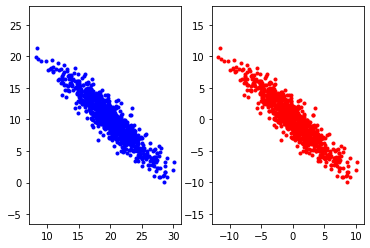

In [14]:
#Load the data
import pandas as pd
eigdata = pd.read_csv("eigdata.txt", sep="\s+", header=None) 
X=eigdata.to_numpy()
_, (plt1, plt2) = plt.subplots(1, 2) 
plt1.plot(X[:,0], X[:,1], 'b.')
plt1.axis('equal')
#Mean-subtract data 
m=np.mean(X,axis=0) 
Y=X-m.reshape((1,-1)) 
plt2.plot(Y[:,0], Y[:,1], 'r.') 
plt2.axis('equal')
plt.show()


**Discussion:**

For this problem, I just copy the code from the Homework. 

# Problem 3

[ 10.50316979 -10.34068314]
[2.11963481 2.15294135]


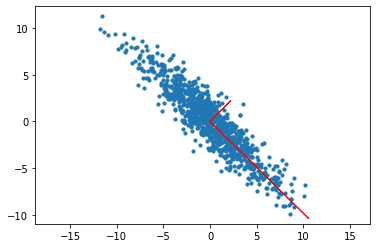

In [15]:
import numpy as np

#eigenvalues (V) and eigenvectors (U)
cov = np.cov(Y.T)
V, U = np.linalg.eig(cov)

#mean
Y_mean = Y - np.mean(Y, axis=0)

# Plot mean-subtracted data
plt.scatter(Y_mean[:,0], Y_mean[:,1], s=10)

mean = np.mean(Y, axis=0)
for i in range(2):
    half_length = np.sqrt(V[i])*3
    end_point = half_length * U[:, i]
    print(end_point);
    plt.arrow(0, 0, end_point[0], end_point[1], color='red', head_width=0.1, head_length=0.1)

plt.axis('equal')
plt.show()

**Discussion:**



*   First, I computed the eigenvalues and eigenvectors in data Y.
*   Then, I calculated the mean of Y and plot the mean_subtracted data Y.
*   And for the last for loop, I used the eigenvalues to calculate the length of each axis and find the end point of each axis. 





# Problem 4

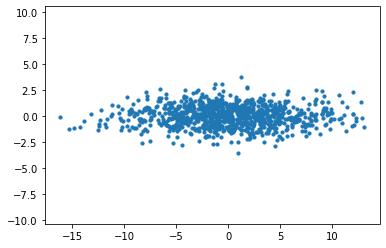

In [16]:
# Rotate the data Y
Y_rotated = np.dot(Y_mean, U)

# Plot rotated data
plt.scatter(Y_rotated[:,0], Y_rotated[:,1], s=10)
plt.axis('equal')
plt.show()


**Discussion:**

For this problem, I first rotate the data Y and then plot the rotated data. 

# Problem 5

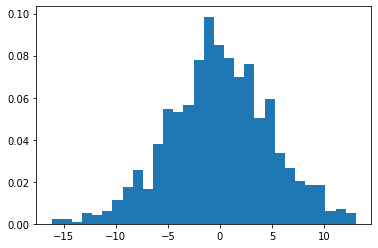

In [17]:
eigenvalues_sorted = np.sort(V)[::-1]
eigenvectors_sorted = U[:, np.argsort(V)[::-1]]

reduced_data = np.dot(Y_mean, eigenvectors_sorted[:,0]).reshape(-1, 1)

plt.hist(reduced_data, bins=30, density=True)
plt.show()


**Discussion:**

I think this 1-D histogram look like a 1-D Gaussian. 